In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import variation

In [2]:
files_dir = glob.glob(r"C:\Users\zcemg08\PycharmProjects\biofuels\data\phys_prop\*.csv")

In [3]:
df0 = pd.read_csv(files_dir[0], encoding= 'unicode_escape')
df1 = pd.read_csv(files_dir[1], encoding= 'unicode_escape')
df2 = pd.read_csv(files_dir[2], encoding= 'unicode_escape')
df3 = pd.read_csv(files_dir[3], encoding= 'unicode_escape')
df4 = pd.read_csv(files_dir[4], encoding= 'unicode_escape')
df5 = pd.read_csv(files_dir[5], encoding= 'unicode_escape')

In [4]:
datka = [df0,df1,df2,df3,df4,df5]

df0['UB(mol/L)'] = None 

In [5]:
for item in datka:
    print(list(item))

['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'Density (g/mL)', 'Boiling Point (K)', 'UB(mol/L)']
['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'UB(mol/L)', 'Density (g/mL)', 'Boiling Point (K)']
['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'UB(mol/L)', 'Density (g/mL)', 'Boiling Point (K)']
['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'UB(mol/L)', 'Density (g/mL)', 'Boiling Point (K)']
['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'UB(mol/L)', 'Density (g/mL)', 'Boiling Point (K)']
['Species', 'SMILES', 'Formula', 'Unified YSI']


In [6]:
count_ = 0

In [7]:
data_ = pd.concat([df0,df1,df2,df3,df4],axis=0)

In [8]:
len_ = 0
for item in datka:
    len_ += len(item)
    print(len_)

313
503
618
733
848
1295


In [9]:
df = pd.concat(datka[:-1])
df = df.drop('NO.',axis=1)
#Drop exact duplicated rows
df = df.drop_duplicates()
#Drop duplicated by Smiles	RON	MON	YSI	?Hc°(KJ/L)	?Hc°(KJ/kg)	RVP(kPa)	Density (g/mL)	Boiling Point (K)
important_columns    = list(df)[1:-1]
df                   = df.drop_duplicates(subset=important_columns)
df                   = df.dropna(subset=['Smiles'])

##### Fuel Properties

(RON)  - representing the antiknock performance 
[1.	Kubic Jr, W.L., et al., Artificial neural network based group contribution method for estimating cetane and octane numbers of hydrocarbons and oxygenated organic compounds. Industrial & Engineering Chemistry Research, 2017. 56(42): p. 12236-12245.]

(YSI)  - describing the emissions of soot
[2.	Das, D.D., et al., Measuring and predicting sooting tendencies of oxygenates, alkanes, alkenes, cycloalkanes, and aromatics on a unified scale. Combustion and Flame, 2018. 190: p. 349-364.

3.	McEnally, Charles S.; Das, Dhrubajyoti D.; Pfefferle, Lisa D., 2017, "Yield Sooting Index Database Volume 2: Sooting Tendencies of a Wide Range of Fuel Compounds on a Unified Scale", https://doi.org/10.7910/DVN/7HGFT8, Harvard Dataverse, V1, UNF:6:n617TMoSmliFFMdXMfOB9w== [fileUNF].]


(DHc)  - combustion heat / evaluating the power performance
[Pan, Y., et al., Predicting the net heat of combustion of organic compounds from molecular structures based on ant colony optimization. Journal of Loss Prevention in the Process Industries, 2011. 24(1): p. 85-89.]


(Density)- [44, A.P.I.R.P. and K.R. Hall, Selected Values of Properties of Hydrocarbons and Related Compounds. 1981: Thermodynamics Research Center.]

(Boiling Point) (K)
[Yaws, C.L., Thermophysical properties of chemicals and hydrocarbons. 2008: William Andrew.]

(RVP)  - Reid vapor pressure / the evaporation performance of gasoline
[Aspen Physical Property System databank.]


(UB)   - the number of unsaturated bonds

In [11]:
df.head(5)

,Compound,Smiles,RON,MON,YSI,?Hc°(KJ/L),?Hc°(KJ/kg),RVP(kPa),Density (g/mL),Boiling Point (K),UB(mol/L)
0,"2,4-Dimethylpentane",CC(C)CC(C)C,86.317222,85.292433,18.964147,29749.93551,44193.53819,20.163661,0.673174,349.689912,None
1,Heptane,CCCCCCC,2.100058,5.788349,15.492068,30434.01910,44842.40477,13.179002,0.678688,365.924403,None
2,"2,2,3-Trimethylbutane",CC(C)(C)C(C)C,106.380839,100.789345,31.332231,29928.10179,44024.11931,27.542545,0.679811,352.273738,None
3,"3,3-Dimethylpentane",CCC(C)(C)CC,88.935130,91.989959,18.105944,30283.40019,44476.16394,22.833933,0.680891,357.408846,None
4,"2,3-Dimethylpentane",CC(C)C(C)CC,88.753001,87.964683,24.657707,29868.56685,44073.29329,17.498149,0.677702,353.830958,None


In [12]:
for col in list(df)[2:]:
    print(col + ' '+ 'number of duplicates = {}'.format(df.duplicated(subset=['Smiles',col]).sum()))

RON number of duplicates = 120
MON number of duplicates = 120
YSI number of duplicates = 120
?Hc°(KJ/L) number of duplicates = 0
?Hc°(KJ/kg) number of duplicates = 0
RVP(kPa) number of duplicates = 120
Density (g/mL) number of duplicates = 120
Boiling Point (K) number of duplicates = 120
UB(mol/L) number of duplicates = 108


In [13]:
def variation_(df):
    return [variation(df[df['Smiles']==x].iloc[:,1]) for x in df[df.duplicated(subset=['Smiles'])]['Smiles'].values]

In [14]:
df_RON     = df[['Smiles','RON']].drop_duplicates()
df_YSI     = df[['Smiles','YSI']].drop_duplicates()
df_comb_h  = df[['Smiles','?Hc°(KJ/kg)']].drop_duplicates()
df_RVP     = df[['Smiles','RVP(kPa)']].drop_duplicates()
df_Density = df[['Smiles','Density (g/mL)']].drop_duplicates()
df_bp      = df[['Smiles','Boiling Point (K)']].drop_duplicates()

Text(0.5, 1.0, 'BP_norm_var')

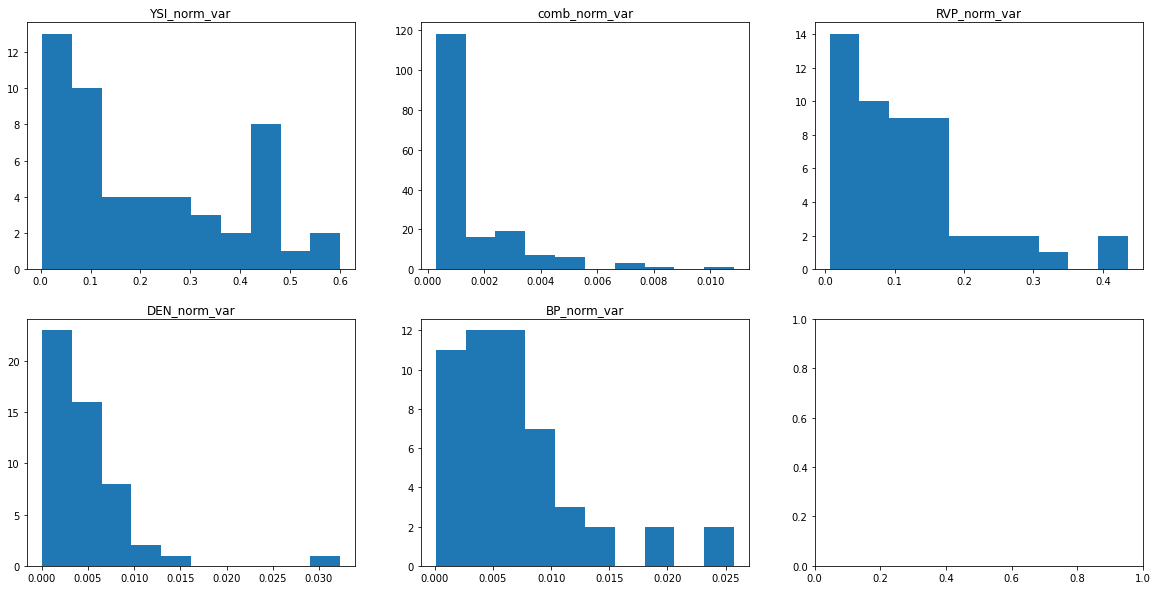

In [15]:
fig, axs = plt.subplots(2, 3,figsize=(20,10))
axs[0, 0].hist(variation_(df_YSI))
axs[0, 0].set_title('YSI_norm_var')

axs[0, 1].hist(variation_(df_comb_h))
axs[0, 1].set_title('comb_norm_var')

axs[0, 2].hist(variation_(df_RVP))
axs[0, 2].set_title('RVP_norm_var')

axs[1, 0].hist(variation_(df_Density))
axs[1, 0].set_title('DEN_norm_var')

axs[1, 1].hist(variation_(df_bp))
axs[1, 1].set_title('BP_norm_var')